## Question 1

#### Report the following statistics for each hashtag, i.e. each file

Have a look at the data

In [1]:
import json

files = ["ECE219_tweet_data/tweets_#gohawks.txt",
         "ECE219_tweet_data/tweets_#gopatriots.txt",
         "ECE219_tweet_data/tweets_#nfl.txt",
         "ECE219_tweet_data/tweets_#patriots.txt",
         "ECE219_tweet_data/tweets_#sb49.txt",
         "ECE219_tweet_data/tweets_#superbowl.txt"]

with open(files[0], 'r') as file:
    first_line = file.readline()
    json_obj = json.loads(first_line)
    for key in json_obj:
        print(key)
    print('-' * 40)
    for key in json_obj:
        print(key + ':')
        print(json_obj[key])
        print('-' * 40)

firstpost_date
title
url
tweet
author
original_author
citation_date
metrics
highlight
type
citation_url
----------------------------------------
firstpost_date:
1419804875
----------------------------------------
title:
I &lt;3 our defense! #GoHawks http://t.co/U1pcXpEsR8
----------------------------------------
url:
http://twitter.com/Mich_Fit/status/549327579782840320
----------------------------------------
tweet:
{'contributors': None, 'truncated': False, 'text': 'I &lt;3 our defense! #GoHawks http://t.co/U1pcXpEsR8', 'in_reply_to_status_id': None, 'id': 549327579782840320, 'favorite_count': 1, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'retweeted': False, 'coordinates': None, 'entities': {'symbols': [], 'media': [{'expanded_url': 'http://twitter.com/Mich_Fit/status/549327579782840320/photo/1', 'sizes': {'large': {'h': 511, 'resize': 'fit', 'w': 511}, 'small': {'h': 340, 'resize': 'fit', 'w': 340}, 'medium': {'h': 511, 'resize': 'fit', 'w': 511}

In [2]:
max_times = {"ECE219_tweet_data/tweets_#gohawks.txt": 0,
             "ECE219_tweet_data/tweets_#gopatriots.txt": 0,
             "ECE219_tweet_data/tweets_#nfl.txt": 0,
             "ECE219_tweet_data/tweets_#patriots.txt": 0,
             "ECE219_tweet_data/tweets_#sb49.txt": 0,
             "ECE219_tweet_data/tweets_#superbowl.txt": 0}

min_times = {"ECE219_tweet_data/tweets_#gohawks.txt": 0,
             "ECE219_tweet_data/tweets_#gopatriots.txt": 0,
             "ECE219_tweet_data/tweets_#nfl.txt": 0,
             "ECE219_tweet_data/tweets_#patriots.txt": 0,
             "ECE219_tweet_data/tweets_#sb49.txt": 0,
             "ECE219_tweet_data/tweets_#superbowl.txt": 0}

In [3]:
# helper funtion to report statistics for one file
# at the same time get max and min times for each file

def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = 2000000000
        total_followers = 0
        total_retweets = 0
        for line in lines:
            json_obj = json.loads(line)
            if(json_obj['citation_date'] > max_time):
                max_time = json_obj['citation_date']
            if(json_obj['citation_date'] < min_time):
                min_time = json_obj['citation_date']
                
            total_followers = total_followers + json_obj['author']['followers']
            
            total_retweets = total_retweets + json_obj['metrics']['citations']['total']
                
        avg_tweets_per_hour = len(lines) / (max_time - min_time) * 60 * 60
        avg_followers_per_tweet = total_followers / len(lines)
        avg_retweets_per_tweet = total_retweets / len(lines)
        
        max_times[filename] = max_time
        min_times[filename] = min_time
        
    print('-' * 40)
    print(filename)
    print("Average number of tweets per hour:")
    print(avg_tweets_per_hour)
    
    print("Average number of followers per tweet:")
    print(avg_followers_per_tweet)
    
    print("Average number of retweets per tweet:")
    print(avg_retweets_per_tweet)

##### • Average number of tweets per hour
##### • Average number of followers of users posting the tweets per tweet
##### • Average number of retweets per tweet

In [4]:
for file in files:
    report_statistics(file)

----------------------------------------
ECE219_tweet_data/tweets_#gohawks.txt
Average number of tweets per hour:
292.48785062173687
Average number of followers per tweet:
2217.9237355281984
Average number of retweets per tweet:
2.0132093991319877
----------------------------------------
ECE219_tweet_data/tweets_#gopatriots.txt
Average number of tweets per hour:
40.954698006061946
Average number of followers per tweet:
1427.2526051635405
Average number of retweets per tweet:
1.4081919101697078
----------------------------------------
ECE219_tweet_data/tweets_#nfl.txt
Average number of tweets per hour:
397.0213901819841
Average number of followers per tweet:
4662.37544523693
Average number of retweets per tweet:
1.5344602655543254
----------------------------------------
ECE219_tweet_data/tweets_#patriots.txt
Average number of tweets per hour:
750.89426460689
Average number of followers per tweet:
3280.4635616550277
Average number of retweets per tweet:
1.7852871288476946
--------------

## Question 2

#### Plot "number of tweets in hour" over time for #SuperBowl and #NFL (a histogram with 1-hour bins)

In [5]:
def get_num_in_hour(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        max_time = max_times[filename]
        min_time = min_times[filename]

        total_hours = round((max_time - min_time) / (60 * 60)) + 1
        X = range(total_hours)
        Y = [0] * total_hours

        for line in lines:
            json_obj = json.loads(line)
            index = round((json_obj['citation_date'] - min_time) / (60 * 60))
            Y[index] = Y[index] + 1

        return X, Y

In [6]:
import matplotlib.pyplot as plt

def plot_num_in_hour(X, Y, name):
    plt.figure(figsize=(10,6))
    plt.bar(X, Y, width=X[1]-X[0])
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    plt.title('number of tweets in hours for ' + name)
    plt.show()

#SuperBowl

In [7]:
SuperBowl_X, SuperBowl_Y = get_num_in_hour(files[5])

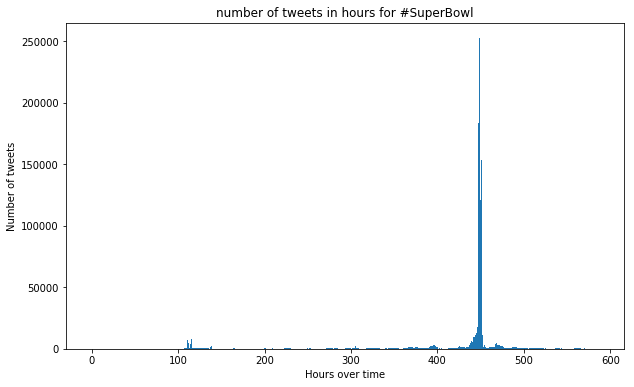

In [8]:
plot_num_in_hour(SuperBowl_X, SuperBowl_Y, "#SuperBowl")

#NFL

In [9]:
NFL_X, NFL_Y = get_num_in_hour(files[2])

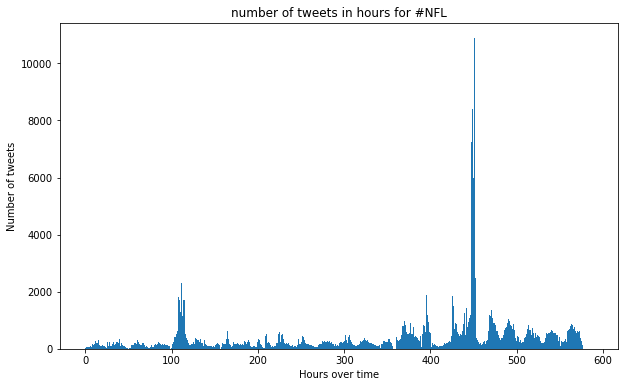

In [10]:
plot_num_in_hour(NFL_X, NFL_Y, "#NFL")

## Question 3

#### For each hashtag, train a linear regression model. For each model, report the model's Mean Squared Error (MSE) and R-squared mesure. Also, analyze the significance of each feature using t-test and p-value.

In [13]:
import datetime
import pytz
import numpy as np

pst_tz = pytz.timezone('America/Los_Angeles')

def extract_feature(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = max_times[filename]
        min_time = min_times[filename]
        
        total_hours = round((max_time - min_time) / (60 * 60)) + 1
        
        num_tweets = 0
        num_retweets = 0
        num_followers = 0
        max_num_followers = 0
        time_windows = []
        
        for hour in range(total_hours):
            datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(min_time + hour * 60 * 60, pst_tz)
            time_of_day = datetime_object_in_pst_timezone.hour
            time_windows.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
            
        for line in lines:
            json_obj = json.loads(line)
            index = round((json_obj['citation_date'] - min_time) / (60 * 60))
            time_windows[index][0] = time_windows[index][0] + 1 # update num_tweets
            time_windows[index][1] = time_windows[index][1] + json_obj['metrics']['citations']['total'] # update num_retweets
            time_windows[index][2] = time_windows[index][2] + json_obj['author']['followers'] # update num_followers
            time_windows[index][3] = max(time_windows[index][3], json_obj['author']['followers']) # update max_num_followers
            
        return np.array(time_windows)

#gohawks

In [14]:
time_windows_gohawks = extract_feature(files[0])

gohawks_X = time_windows_gohawks[0:-1,:]
gohawks_Y = time_windows_gohawks[1:,0]

In [18]:
from statsmodels.api import OLS

lr_gohawks = OLS(gohawks_Y, gohawks_X).fit()

print(lr_gohawks.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     279.5
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          4.57e-151
Time:                        19:47:20   Log-Likelihood:                -4540.0
No. Observations:                 578   AIC:                             9090.
Df Residuals:                     573   BIC:                             9112.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1645      0.119      9.748      0.0

In [19]:
from statsmodels.api import tools
gohawks_predict = lr_gohawks.predict(gohawks_X)
gohawks_mse = tools.eval_measures.mse(gohawks_Y, gohawks_predict)

print("MSE for #gohawks:", gohawks_mse)

MSE for #gohawks: 389086.61457122036


#gopatriots

In [20]:
time_windows_gopatriots = extract_feature(files[1])

gopatriots_X = time_windows_gopatriots[0:-1,:]
gopatriots_Y = time_windows_gopatriots[1:,0]

In [21]:
lr_gopatriots = OLS(gopatriots_Y, gopatriots_X).fit()

print(lr_gopatriots.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     94.54
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           2.14e-72
Time:                        20:03:12   Log-Likelihood:                -3905.5
No. Observations:                 574   AIC:                             7821.
Df Residuals:                     569   BIC:                             7843.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.5580      0.298     -5.227      0.0

In [22]:
gopatriots_predict = lr_gopatriots.predict(gopatriots_X)
gopatriots_mse = tools.eval_measures.mse(gopatriots_Y, gopatriots_predict)

print("MSE for #gopatriots:", gopatriots_mse)

MSE for #gopatriots: 47576.188942486355


#nfl

In [23]:
time_windows_nfl = extract_feature(files[2])

nfl_X = time_windows_nfl[0:-1,:]
nfl_Y = time_windows_nfl[1:,0]

In [24]:
lr_nfl = OLS(nfl_Y, nfl_X).fit()

print(lr_nfl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     315.4
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          5.03e-163
Time:                        20:06:04   Log-Likelihood:                -4428.3
No. Observations:                 587   AIC:                             8867.
Df Residuals:                     582   BIC:                             8889.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4814      0.114      4.208      0.0

In [25]:
nfl_predict = lr_nfl.predict(nfl_X)
nfl_mse = tools.eval_measures.mse(nfl_Y, nfl_predict)

print("MSE for #nfl:", nfl_mse)

MSE for #nfl: 209013.3222443561


#patriots

In [26]:
time_windows_patriots = extract_feature(files[3])

patriots_X = time_windows_patriots[0:-1,:]
patriots_Y = time_windows_patriots[1:,0]

In [27]:
lr_patriots = OLS(patriots_Y, patriots_X).fit()

print(lr_patriots.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     232.8
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          2.92e-136
Time:                        20:10:34   Log-Likelihood:                -5386.3
No. Observations:                 587   AIC:                         1.078e+04
Df Residuals:                     582   BIC:                         1.080e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0036      0.085     11.838      0.0

In [28]:
patriots_predict = lr_patriots.predict(patriots_X)
patriots_mse = tools.eval_measures.mse(patriots_Y, patriots_predict)

print("MSE for #patriots:", patriots_mse)

MSE for #patriots: 5466476.76932625


#sb49

In [29]:
time_windows_sb49 = extract_feature(files[4])

sb49_X = time_windows_sb49[0:-1,:]
sb49_Y = time_windows_sb49[1:,0]

In [30]:
lr_sb49 = OLS(sb49_Y, sb49_X).fit()

print(lr_sb49.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     475.2
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          7.28e-202
Time:                        20:15:48   Log-Likelihood:                -5662.4
No. Observations:                 582   AIC:                         1.133e+04
Df Residuals:                     577   BIC:                         1.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0912      0.088     12.395      0.0

In [31]:
sb49_predict = lr_sb49.predict(sb49_X)
sb49_mse = tools.eval_measures.mse(sb49_Y, sb49_predict)

print("MSE for #sb49:", sb49_mse)

MSE for #sb49: 16530174.167058893


#superbowl

In [32]:
time_windows_superbowl = extract_feature(files[5])

superbowl_X = time_windows_superbowl[0:-1,:]
superbowl_Y = time_windows_superbowl[1:,0]

In [33]:
lr_superbowl = OLS(superbowl_Y, superbowl_X).fit()

print(lr_superbowl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     415.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          4.34e-189
Time:                        20:23:59   Log-Likelihood:                -6069.3
No. Observations:                 586   AIC:                         1.215e+04
Df Residuals:                     581   BIC:                         1.217e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5533      0.111     23.094      0.0

In [34]:
superbowl_predict = lr_superbowl.predict(superbowl_X)
superbowl_mse = tools.eval_measures.mse(superbowl_Y, superbowl_predict)

print("MSE for #superbowl:", superbowl_mse)

MSE for #superbowl: 58037195.52955217


## Question 4

#### Design a regression model using any features from the paper you find or other new features you may find useful for this problem. Fit your model on the data of each hashtag and report fitting MSE and significance of features.

##### New Features (with reference to paper)
• Author Count  
• Mentions Count  
• Passivity   
• Friends Count  
• Ranking Score

In [42]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
          'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

def get_account_days(tweet):
    account_create_date = tweet['tweet']['user']['created_at'].split(' ')
    post_date = tweet['tweet']['created_at'].split(' ')
    datetime_account = datetime.datetime(int(account_create_date[5]),
                                         months[account_create_date[1]],
                                         int(account_create_date[2]))
    datetime_post = datetime.datetime(int(post_date[5]),
                                      months[post_date[1]],
                                      int(post_date[2]))
    return (datetime_post - datetime_account).days

In [59]:
def extract_feature_v2(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = max_times[filename]
        min_time = min_times[filename]
        
        total_hours = round((max_time - min_time) / (60 * 60)) + 1
        
        authors = []
        unique_authors = 0
        mentions = 0
        passivity = 0.0
        num_friends = 0
        ranking_score = 0.0
        time_windows = []
        
        for hour in range(total_hours):
            authors.append(set())
            time_windows.append([unique_authors, mentions, passivity, num_friends, ranking_score])
            
        for line in lines:
            json_obj = json.loads(line)
            index = round((json_obj['citation_date'] - min_time) / (60 * 60))
            authors[index].add(json_obj['author']['name'])
            time_windows[index][1] = time_windows[index][1] + len(json_obj['tweet']['entities']['user_mentions'])
            
            account_days = get_account_days(json_obj)
            num_tweets = json_obj['tweet']['user']['followers_count']
            time_windows[index][2] = time_windows[index][2] + (account_days / (1.0 + num_tweets))
            
            time_windows[index][3] = time_windows[index][3] + json_obj['tweet']['user']['friends_count']
            time_windows[index][4] = time_windows[index][4] + json_obj['metrics']['ranking_score']
            
        for i in range(total_hours):
            time_windows[i][0] = len(authors[i])
            
        return np.array(time_windows)

#gohawks

In [79]:
time_windows_gohawks_v2 = extract_feature_v2(files[0])

gohawks_X_v2 = time_windows_gohawks_v2[0:-1,:]
gohawks_Y_v2 = time_windows_gohawks[1:,0]

In [81]:
lr_gohawks_v2 = OLS(gohawks_Y_v2, gohawks_X_v2).fit()

print(lr_gohawks_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     355.2
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          6.72e-173
Time:                        10:54:02   Log-Likelihood:                -4489.2
No. Observations:                 578   AIC:                             8988.
Df Residuals:                     573   BIC:                             9010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7854      0.416     -1.890      0.0

In [82]:
gohawks_predict_v2 = lr_gohawks_v2.predict(gohawks_X_v2)
gohawks_mse_v2 = tools.eval_measures.mse(gohawks_Y_v2, gohawks_predict_v2)

print("MSE for #gohawks:", gohawks_mse_v2)

MSE for #gohawks: 326359.91003858065


#gopatriots

In [83]:
time_windows_gopatriots_v2 = extract_feature_v2(files[1])

gopatriots_X_v2 = time_windows_gopatriots_v2[0:-1,:]
gopatriots_Y_v2 = time_windows_gopatriots[1:,0]

In [84]:
lr_gopatriots_v2 = OLS(gopatriots_Y_v2, gopatriots_X_v2).fit()

print(lr_gopatriots_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     208.1
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          6.26e-126
Time:                        10:54:38   Log-Likelihood:                -3780.6
No. Observations:                 574   AIC:                             7571.
Df Residuals:                     569   BIC:                             7593.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.9160      0.815      9.719      0.0

In [85]:
gopatriots_predict_v2 = lr_gopatriots_v2.predict(gopatriots_X_v2)
gopatriots_mse_v2 = tools.eval_measures.mse(gopatriots_Y_v2, gopatriots_predict_v2)

print("MSE for #gopatriots:", gopatriots_mse_v2)

MSE for #gopatriots: 30790.34299826502


#nfl

In [86]:
time_windows_nfl_v2 = extract_feature_v2(files[2])

nfl_X_v2 = time_windows_nfl_v2[0:-1,:]
nfl_Y_v2 = time_windows_nfl[1:,0]

In [87]:
lr_nfl_v2 = OLS(nfl_Y_v2, nfl_X_v2).fit()

print(lr_nfl_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     307.8
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          8.88e-161
Time:                        10:56:09   Log-Likelihood:                -4433.6
No. Observations:                 587   AIC:                             8877.
Df Residuals:                     582   BIC:                             8899.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3226      0.326     -0.989      0.3

In [88]:
nfl_predict_v2 = lr_nfl_v2.predict(nfl_X_v2)
nfl_mse_v2 = tools.eval_measures.mse(nfl_Y_v2, nfl_predict_v2)

print("MSE for #nfl:", nfl_mse_v2)

MSE for #nfl: 212769.83907092322


#patriots

In [89]:
time_windows_patriots_v2 = extract_feature_v2(files[3])

patriots_X_v2 = time_windows_patriots_v2[0:-1,:]
patriots_Y_v2 = time_windows_patriots[1:,0]

In [90]:
lr_patriots_v2 = OLS(patriots_Y_v2, patriots_X_v2).fit()

print(lr_patriots_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     300.7
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          1.15e-158
Time:                        10:57:16   Log-Likelihood:                -5334.2
No. Observations:                 587   AIC:                         1.068e+04
Df Residuals:                     582   BIC:                         1.070e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.9760      0.958     -3.106      0.0

In [91]:
patriots_predict_v2 = lr_patriots_v2.predict(patriots_X_v2)
patriots_mse_v2 = tools.eval_measures.mse(patriots_Y_v2, patriots_predict_v2)

print("MSE for #patriots:", patriots_mse_v2)

MSE for #patriots: 4576598.777337125


#sb49

In [92]:
time_windows_sb49_v2 = extract_feature_v2(files[4])

sb49_X_v2 = time_windows_sb49_v2[0:-1,:]
sb49_Y_v2 = time_windows_sb49[1:,0]

In [93]:
lr_sb49_v2 = OLS(sb49_Y_v2, sb49_X_v2).fit()

print(lr_sb49_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     765.6
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          6.39e-252
Time:                        11:00:11   Log-Likelihood:                -5546.1
No. Observations:                 582   AIC:                         1.110e+04
Df Residuals:                     577   BIC:                         1.112e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1201      0.551      3.851      0.0

In [94]:
sb49_predict_v2 = lr_sb49_v2.predict(sb49_X_v2)
sb49_mse_v2 = tools.eval_measures.mse(sb49_Y_v2, sb49_predict_v2)

print("MSE for #sb49:", sb49_mse_v2)

MSE for #sb49: 11081474.184033835


#superbowl

In [95]:
time_windows_superbowl_v2 = extract_feature_v2(files[5])

superbowl_X_v2 = time_windows_superbowl_v2[0:-1,:]
superbowl_Y_v2 = time_windows_superbowl[1:,0]

In [96]:
lr_superbowl_v2 = OLS(superbowl_Y_v2, superbowl_X_v2).fit()

print(lr_superbowl_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     357.5
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          1.24e-174
Time:                        11:06:33   Log-Likelihood:                -6103.0
No. Observations:                 586   AIC:                         1.222e+04
Df Residuals:                     581   BIC:                         1.224e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1148      0.493     -2.263      0.0

In [97]:
superbowl_predict_v2 = lr_superbowl_v2.predict(superbowl_X_v2)
superbowl_mse_v2 = tools.eval_measures.mse(superbowl_Y_v2, superbowl_predict_v2)

print("MSE for #superbowl:", superbowl_mse_v2)

MSE for #superbowl: 65094852.30742756


## Question 5

#### For each of the top 3 features (i.e. with the smallest p-values), draw a scatter plot of predictant (number of tweets for next hour) versus value of that feature

For each hashtag, the top 3 features are a bit different. So we pick the top 3 by majority count. They are Mentions Count, Passivity and Friends Count

In [103]:
def scatter_plot(feature_values, predictant, hashtag, features):
    print('-' * 20, hashtag, '-' * 20)
    for i in range(len(feature_values)):
        plt.scatter(feature_values[i], predictant, alpha=0.5)
        plt.title("Tweets next hour - " + features[i])
        plt.xlabel(features[i])
        plt.ylabel("Tweets next hour")
        plt.grid(True)
        plt.show()

#gohawks

-------------------- #gohawks --------------------


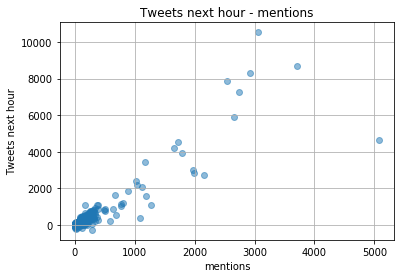

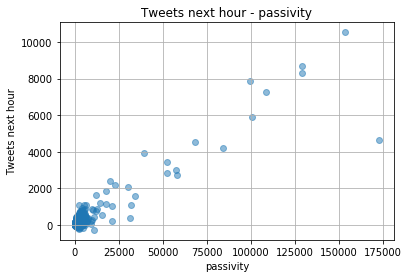

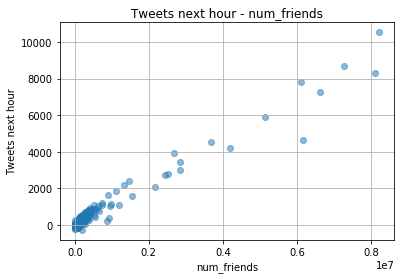

In [104]:
scatter_plot([time_windows_gohawks_v2[0:-1,1], time_windows_gohawks_v2[0:-1,2], time_windows_gohawks_v2[0:-1,3]],
             gohawks_predict_v2,
             "#gohawks",
             ["mentions", "passivity", "num_friends"])

#gopatriots

-------------------- #gopatriots --------------------


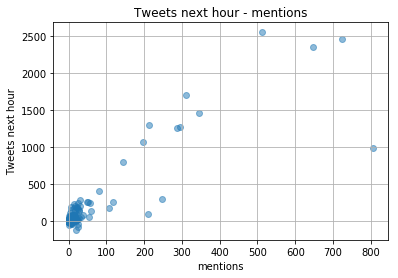

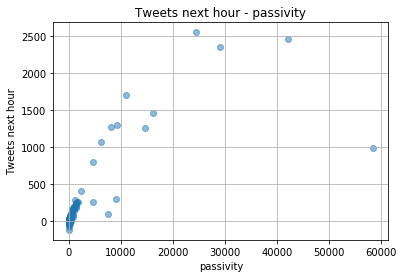

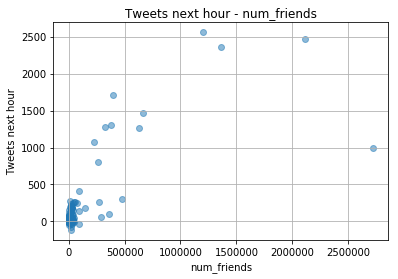

In [106]:
scatter_plot([time_windows_gopatriots_v2[0:-1,1], time_windows_gopatriots_v2[0:-1,2], time_windows_gopatriots_v2[0:-1,3]],
             gopatriots_predict_v2,
             "#gopatriots",
             ["mentions", "passivity", "num_friends"])

#nfl

-------------------- #nfl --------------------


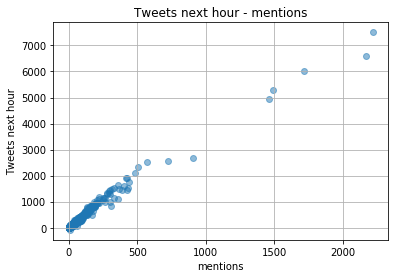

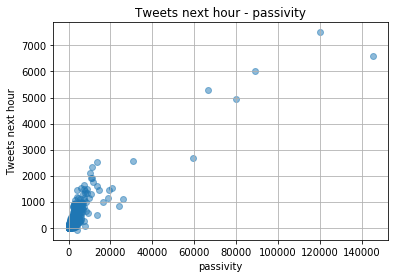

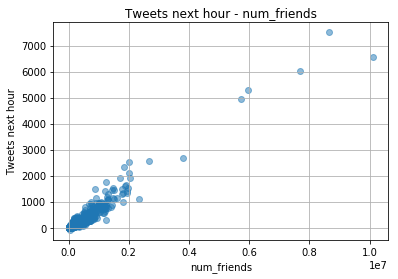

In [107]:
scatter_plot([time_windows_nfl_v2[0:-1,1], time_windows_nfl_v2[0:-1,2], time_windows_nfl_v2[0:-1,3]],
             nfl_predict_v2,
             "#nfl",
             ["mentions", "passivity", "num_friends"])

#patriots

-------------------- #patriots --------------------


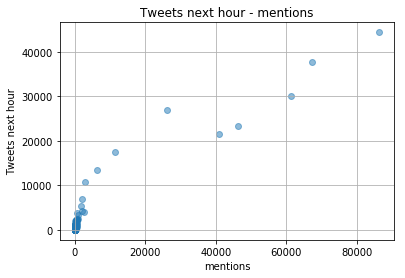

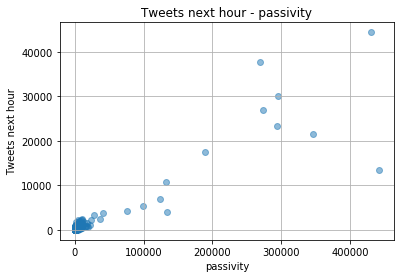

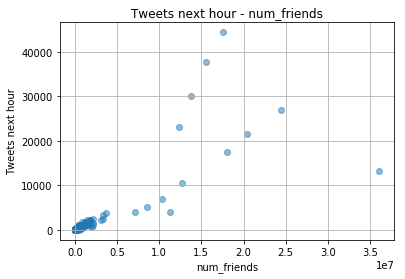

In [108]:
scatter_plot([time_windows_patriots_v2[0:-1,1], time_windows_patriots_v2[0:-1,2], time_windows_patriots_v2[0:-1,3]],
             patriots_predict_v2,
             "#patriots",
             ["mentions", "passivity", "num_friends"])

#sb49

-------------------- #sb49 --------------------


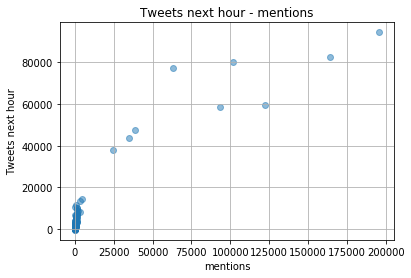

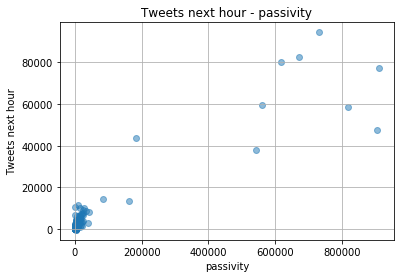

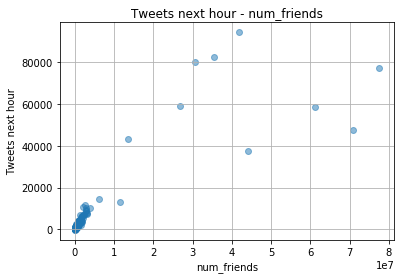

In [109]:
scatter_plot([time_windows_sb49_v2[0:-1,1], time_windows_sb49_v2[0:-1,2], time_windows_sb49_v2[0:-1,3]],
             sb49_predict_v2,
             "#sb49",
             ["mentions", "passivity", "num_friends"])

#superbowl

-------------------- #superbowl --------------------


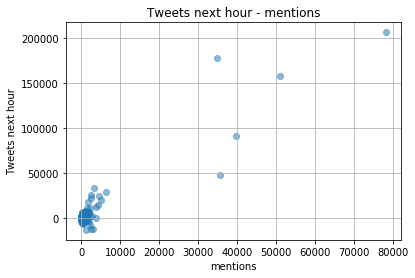

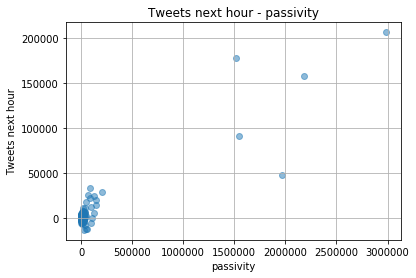

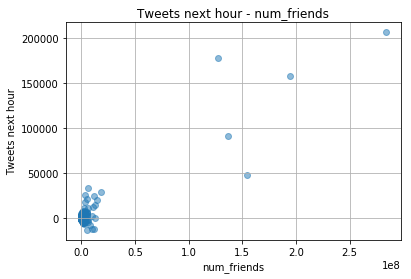

In [110]:
scatter_plot([time_windows_superbowl_v2[0:-1,1], time_windows_superbowl_v2[0:-1,2], time_windows_superbowl_v2[0:-1,3]],
             superbowl_predict_v2,
             "#superbowl",
             ["mentions", "passivity", "num_friends"])

## Question 6

Define 3 time periods and corresponding window length as follows:  
1. Before Feb.1, 8:00 a.m.: 1-hour window  
2. Between Feb.1, 8:00 a.m. and 8:00 p.m.: 5-minute window  
3. After Feb.1, 8:00 p.m.: 1-hour window   
  
For each hashtag, trian 3 regression models. Report the MSE and R-squared score for each case.

In [112]:
import time

pst_tz = pytz.timezone('America/Los_Angeles')

key_time1 = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pst_tz)
key_time1_unix = time.mktime(key_time1.timetuple())

key_time2 = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pst_tz)
key_time2_unix = time.mktime(key_time2.timetuple())

print("unix time for Feb.1, 8:00 a.m.:", key_time1_unix)
print("unix time for Feb.1, 8:00 p.m.:", key_time2_unix)

unix time for Feb.1, 8:00 a.m.: 1422806400.0
unix time for Feb.1, 8:00 p.m.: 1422849600.0


In [113]:
# use the same features in Question 3

def extract_feature_v3(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = max_times[filename]
        min_time = min_times[filename]
        
        total_windows_before = round((key_time1_unix - min_time) / (60 * 60)) + 1
        total_windows_between = round((key_time2_unix - key_time1_unix) / (60 * 5)) + 1
        total_windows_after = round((max_time - key_time2_unix) / (60 * 60)) + 1
        
        num_tweets = 0
        num_retweets = 0
        num_followers = 0
        max_num_followers = 0
        time_window_before = []
        time_window_between = []
        time_window_after = []
        
        for index in range(total_windows_before):
            datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(min_time + index * 60 * 60, pst_tz)
            time_of_day = datetime_object_in_pst_timezone.hour
            time_window_before.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
            
        for index in range(total_windows_between):
            datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(key_time1_unix + index * 60 * 5, pst_tz)
            time_of_day = datetime_object_in_pst_timezone.hour
            time_window_between.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
            
        for index in range(total_windows_after):
            datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(key_time2_unix + index * 60 * 60, pst_tz)
            time_of_day = datetime_object_in_pst_timezone.hour
            time_window_after.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
            
        for line in lines:
            json_obj = json.loads(line)
            time = json_obj['citation_date']
            
            if time < key_time1_unix:
                index = round((json_obj['citation_date'] - min_time) / (60 * 60))
                time_window_before[index][0] = time_window_before[index][0] + 1
                time_window_before[index][1] = time_window_before[index][1] + json_obj['metrics']['citations']['total']
                time_window_before[index][2] = time_window_before[index][2] + json_obj['author']['followers']
                time_window_before[index][3] = max(time_window_before[index][3], json_obj['author']['followers'])
            elif time < key_time2_unix:
                index = round((json_obj['citation_date'] - key_time1_unix) / (60 * 5))
                time_window_between[index][0] = time_window_between[index][0] + 1
                time_window_between[index][1] = time_window_between[index][1] + json_obj['metrics']['citations']['total']
                time_window_between[index][2] = time_window_between[index][2] + json_obj['author']['followers']
                time_window_between[index][3] = max(time_window_between[index][3], json_obj['author']['followers'])
            else:
                index = round((json_obj['citation_date'] - key_time2_unix) / (60 * 60))
                time_window_after[index][0] = time_window_after[index][0] + 1
                time_window_after[index][1] = time_window_after[index][1] + json_obj['metrics']['citations']['total']
                time_window_after[index][2] = time_window_after[index][2] + json_obj['author']['followers']
                time_window_after[index][3] = max(time_window_after[index][3], json_obj['author']['followers'])

        return np.array(time_window_before), np.array(time_window_between), np.array(time_window_after)
    

#gohawks

In [114]:
time_window_before_gohawks, time_window_between_gohawks, time_window_after_gohawks = extract_feature_v3(files[0])

gohawks_X_before = time_window_before_gohawks[0:-1,:]
gohawks_Y_before = time_window_before_gohawks[1:,0]

gohawks_X_between = time_window_between_gohawks[0:-1,:]
gohawks_Y_between = time_window_between_gohawks[1:,0]

gohawks_X_after = time_window_after_gohawks[0:-1,:]
gohawks_Y_after = time_window_after_gohawks[1:,0]

In [115]:
lr_gohawks_before = OLS(gohawks_Y_before, gohawks_X_before).fit()

print(lr_gohawks_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     172.4
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          8.76e-101
Time:                        13:33:57   Log-Likelihood:                -3391.6
No. Observations:                 440   AIC:                             6793.
Df Residuals:                     435   BIC:                             6814.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9906      0.148     13.418      0.0

In [116]:
gohawks_predict_before = lr_gohawks_before.predict(gohawks_X_before)
gohawks_mse_before = tools.eval_measures.mse(gohawks_Y_before, gohawks_predict_before)

print("MSE for #gohawks before Feb.1 8:00 a.m.:", gohawks_mse_before)

MSE for #gohawks before Feb.1 8:00 a.m.: 290288.97685053764


In [117]:
lr_gohawks_between = OLS(gohawks_Y_between, gohawks_X_between).fit()

print(lr_gohawks_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     47.02
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.94e-28
Time:                        13:36:17   Log-Likelihood:                -1047.6
No. Observations:                 144   AIC:                             2105.
Df Residuals:                     139   BIC:                             2120.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5648      0.316      1.785      0.0

In [118]:
gohawks_predict_between = lr_gohawks_between.predict(gohawks_X_between)
gohawks_mse_between = tools.eval_measures.mse(gohawks_Y_between, gohawks_predict_between)

print("MSE for #gohawks between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", gohawks_mse_between)

MSE for #gohawks between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 122111.3256125044


In [119]:
lr_gohawks_after = OLS(gohawks_Y_after, gohawks_X_after).fit()

print(lr_gohawks_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.69e-54
Time:                        13:37:40   Log-Likelihood:                -657.72
No. Observations:                 126   AIC:                             1325.
Df Residuals:                     121   BIC:                             1340.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6358      0.135      4.704      0.0

In [120]:
gohawks_predict_after = lr_gohawks_after.predict(gohawks_X_after)
gohawks_mse_after = tools.eval_measures.mse(gohawks_Y_after, gohawks_predict_after)

print("MSE for #gohawks after Feb.1 8:00 p.m.:", gohawks_mse_after)

MSE for #gohawks after Feb.1 8:00 p.m.: 2002.4089945633852


#gopatriots

In [121]:
time_window_before_gopatriots, time_window_between_gopatriots, time_window_after_gopatriots = extract_feature_v3(files[1])

gopatriots_X_before = time_window_before_gopatriots[0:-1,:]
gopatriots_Y_before = time_window_before_gopatriots[1:,0]

gopatriots_X_between = time_window_between_gopatriots[0:-1,:]
gopatriots_Y_between = time_window_between_gopatriots[1:,0]

gopatriots_X_after = time_window_after_gopatriots[0:-1,:]
gopatriots_Y_after = time_window_after_gopatriots[1:,0]

In [122]:
lr_gopatriots_before = OLS(gopatriots_Y_before, gopatriots_X_before).fit()

print(lr_gopatriots_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     74.52
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           3.22e-56
Time:                        13:41:04   Log-Likelihood:                -2349.6
No. Observations:                 438   AIC:                             4709.
Df Residuals:                     433   BIC:                             4730.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6487      0.349     10.452      0.0

In [123]:
gopatriots_predict_before = lr_gopatriots_before.predict(gopatriots_X_before)
gopatriots_mse_before = tools.eval_measures.mse(gopatriots_Y_before, gopatriots_predict_before)

print("MSE for #gopatriots before Feb.1 8:00 a.m.:", gopatriots_mse_before)

MSE for #gopatriots before Feb.1 8:00 a.m.: 2672.805976590645


In [124]:
lr_gopatriots_between = OLS(gopatriots_Y_between, gopatriots_X_between).fit()

print(lr_gopatriots_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     39.80
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           3.11e-25
Time:                        13:43:02   Log-Likelihood:                -903.12
No. Observations:                 144   AIC:                             1816.
Df Residuals:                     139   BIC:                             1831.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0081      0.376      0.022      0.9

In [125]:
gopatriots_predict_between = lr_gopatriots_between.predict(gopatriots_X_between)
gopatriots_mse_between = tools.eval_measures.mse(gopatriots_Y_between, gopatriots_predict_between)

print("MSE for #gopatriots between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", gopatriots_mse_between)

MSE for #gopatriots between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 16405.867336461277


In [126]:
lr_gopatriots_after = OLS(gopatriots_Y_after, gopatriots_X_after).fit()

print(lr_gopatriots_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     79.76
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.44e-36
Time:                        13:44:16   Log-Likelihood:                -454.59
No. Observations:                 124   AIC:                             919.2
Df Residuals:                     119   BIC:                             933.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5825      0.224      2.605      0.0

In [127]:
gopatriots_predict_after = lr_gopatriots_after.predict(gopatriots_X_after)
gopatriots_mse_after = tools.eval_measures.mse(gopatriots_Y_after, gopatriots_predict_after)

print("MSE for #gopatriots after Feb.1 8:00 p.m.:", gopatriots_mse_after)

MSE for #gopatriots after Feb.1 8:00 p.m.: 89.50224958341418


#nfl

In [128]:
time_window_before_nfl, time_window_between_nfl, time_window_after_nfl = extract_feature_v3(files[2])

nfl_X_before = time_window_before_nfl[0:-1,:]
nfl_Y_before = time_window_before_nfl[1:,0]

nfl_X_between = time_window_between_nfl[0:-1,:]
nfl_Y_between = time_window_between_nfl[1:,0]

nfl_X_after = time_window_after_nfl[0:-1,:]
nfl_Y_after = time_window_after_nfl[1:,0]

In [129]:
lr_nfl_before = OLS(nfl_Y_before, nfl_X_before).fit()

print(lr_nfl_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          1.73e-117
Time:                        13:51:07   Log-Likelihood:                -3035.9
No. Observations:                 440   AIC:                             6082.
Df Residuals:                     435   BIC:                             6102.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7611      0.088      8.655      0.0

In [130]:
nfl_predict_before = lr_nfl_before.predict(nfl_X_before)
nfl_mse_before = tools.eval_measures.mse(nfl_Y_before, nfl_predict_before)

print("MSE for #nfl before Feb.1 8:00 a.m.:", nfl_mse_before)

MSE for #nfl before Feb.1 8:00 a.m.: 57620.76162516333


In [131]:
lr_nfl_between = OLS(nfl_Y_between, nfl_X_between).fit()

print(lr_nfl_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     239.0
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.09e-66
Time:                        13:52:14   Log-Likelihood:                -927.50
No. Observations:                 144   AIC:                             1865.
Df Residuals:                     139   BIC:                             1880.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0802      0.116      9.340      0.0

In [132]:
nfl_predict_between = lr_nfl_between.predict(nfl_X_between)
nfl_mse_between = tools.eval_measures.mse(nfl_Y_between, nfl_predict_between)

print("MSE for #nfl between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", nfl_mse_between)

MSE for #nfl between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 23019.976901364116


In [133]:
lr_nfl_after = OLS(nfl_Y_after, nfl_X_after).fit()

print(lr_nfl_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     465.5
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           3.98e-81
Time:                        13:53:20   Log-Likelihood:                -847.89
No. Observations:                 135   AIC:                             1706.
Df Residuals:                     130   BIC:                             1720.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9287      0.097      9.545      0.0

In [134]:
nfl_predict_after = lr_nfl_after.predict(nfl_X_after)
nfl_mse_after = tools.eval_measures.mse(nfl_Y_after, nfl_predict_after)

print("MSE for #nfl after Feb.1 8:00 p.m.:", nfl_mse_after)

MSE for #nfl after Feb.1 8:00 p.m.: 16706.081053186925


#patriots

In [135]:
time_window_before_patriots, time_window_between_patriots, time_window_after_patriots = extract_feature_v3(files[3])

patriots_X_before = time_window_before_patriots[0:-1,:]
patriots_Y_before = time_window_before_patriots[1:,0]

patriots_X_between = time_window_between_patriots[0:-1,:]
patriots_Y_between = time_window_between_patriots[1:,0]

patriots_X_after = time_window_after_patriots[0:-1,:]
patriots_Y_after = time_window_after_patriots[1:,0]

In [136]:
lr_patriots_before = OLS(patriots_Y_before, patriots_X_before).fit()

print(lr_patriots_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.94e-74
Time:                        14:00:05   Log-Likelihood:                -3470.0
No. Observations:                 440   AIC:                             6950.
Df Residuals:                     435   BIC:                             6970.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0600      0.206     -5.152      0.0

In [137]:
patriots_predict_before = lr_patriots_before.predict(patriots_X_before)
patriots_mse_before = tools.eval_measures.mse(patriots_Y_before, patriots_predict_before)

print("MSE for #patriots before Feb.1 8:00 a.m.:", patriots_mse_before)

MSE for #patriots before Feb.1 8:00 a.m.: 414481.8008567434


In [138]:
lr_patriots_between = OLS(patriots_Y_between, patriots_X_between).fit()

print(lr_patriots_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     227.3
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           4.66e-65
Time:                        14:01:12   Log-Likelihood:                -1169.1
No. Observations:                 144   AIC:                             2348.
Df Residuals:                     139   BIC:                             2363.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8512      0.240      3.549      0.0

In [139]:
patriots_predict_between = lr_patriots_between.predict(patriots_X_between)
patriots_mse_between = tools.eval_measures.mse(patriots_Y_between, patriots_predict_between)

print("MSE for #patriots between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", patriots_mse_between)

MSE for #patriots between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 660210.518734672


In [140]:
lr_patriots_after = OLS(patriots_Y_after, patriots_X_after).fit()

print(lr_patriots_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     333.5
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.57e-72
Time:                        14:02:20   Log-Likelihood:                -825.09
No. Observations:                 135   AIC:                             1660.
Df Residuals:                     130   BIC:                             1675.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0117      0.090     -0.130      0.8

In [141]:
patriots_predict_after = lr_patriots_after.predict(patriots_X_after)
patriots_mse_after = tools.eval_measures.mse(patriots_Y_after, patriots_predict_after)

print("MSE for #patriots after Feb.1 8:00 p.m.:", patriots_mse_after)

MSE for #patriots after Feb.1 8:00 p.m.: 11916.856419764157


#sb49

In [142]:
time_window_before_sb49, time_window_between_sb49, time_window_after_sb49 = extract_feature_v3(files[4])

sb49_X_before = time_window_before_sb49[0:-1,:]
sb49_Y_before = time_window_before_sb49[1:,0]

sb49_X_between = time_window_between_sb49[0:-1,:]
sb49_Y_between = time_window_between_sb49[1:,0]

sb49_X_after = time_window_after_sb49[0:-1,:]
sb49_Y_after = time_window_after_sb49[1:,0]

In [143]:
lr_sb49_before = OLS(sb49_Y_before, sb49_X_before).fit()

print(lr_sb49_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     647.6
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          1.37e-197
Time:                        14:08:10   Log-Likelihood:                -2547.1
No. Observations:                 435   AIC:                             5104.
Df Residuals:                     430   BIC:                             5125.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0251      0.039     26.460      0.0

In [144]:
sb49_predict_before = lr_sb49_before.predict(sb49_X_before)
sb49_mse_before = tools.eval_measures.mse(sb49_Y_before, sb49_predict_before)

print("MSE for #sb49 before Feb.1 8:00 a.m.:", sb49_mse_before)

MSE for #sb49 before Feb.1 8:00 a.m.: 7136.773182458621


In [145]:
lr_sb49_between = OLS(sb49_Y_between, sb49_X_between).fit()

print(lr_sb49_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     492.0
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.68e-86
Time:                        14:09:13   Log-Likelihood:                -1232.8
No. Observations:                 144   AIC:                             2476.
Df Residuals:                     139   BIC:                             2491.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0018      0.065     15.338      0.0

In [146]:
sb49_predict_between = lr_sb49_between.predict(sb49_X_between)
sb49_mse_between = tools.eval_measures.mse(sb49_Y_between, sb49_predict_between)

print("MSE for #sb49 between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", sb49_mse_between)

MSE for #sb49 between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 1598766.7936376657


In [147]:
lr_sb49_after = OLS(sb49_Y_after, sb49_X_after).fit()

print(lr_sb49_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     321.5
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.32e-71
Time:                        14:10:20   Log-Likelihood:                -920.99
No. Observations:                 135   AIC:                             1852.
Df Residuals:                     130   BIC:                             1867.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4415      0.066      6.692      0.0

In [148]:
sb49_predict_after = lr_sb49_after.predict(sb49_X_after)
sb49_mse_after = tools.eval_measures.mse(sb49_Y_after, sb49_predict_after)

print("MSE for #sb49 after Feb.1 8:00 p.m.:", sb49_mse_after)

MSE for #sb49 after Feb.1 8:00 p.m.: 49338.55222581286


#superbowl

In [149]:
time_window_before_superbowl, time_window_between_superbowl, time_window_after_superbowl = extract_feature_v3(files[5])

superbowl_X_before = time_window_before_superbowl[0:-1,:]
superbowl_Y_before = time_window_before_superbowl[1:,0]

superbowl_X_between = time_window_between_superbowl[0:-1,:]
superbowl_Y_between = time_window_between_superbowl[1:,0]

superbowl_X_after = time_window_after_superbowl[0:-1,:]
superbowl_Y_after = time_window_after_superbowl[1:,0]

In [150]:
lr_superbowl_before = OLS(superbowl_Y_before, superbowl_X_before).fit()

print(lr_superbowl_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     129.0
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.38e-83
Time:                        14:17:46   Log-Likelihood:                -3453.5
No. Observations:                 440   AIC:                             6917.
Df Residuals:                     435   BIC:                             6937.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3581      0.107      3.336      0.0

In [151]:
superbowl_predict_before = lr_superbowl_before.predict(superbowl_X_before)
superbowl_mse_before = tools.eval_measures.mse(superbowl_Y_before, superbowl_predict_before)

print("MSE for #superbowl before Feb.1 8:00 a.m.:", superbowl_mse_before)

MSE for #superbowl before Feb.1 8:00 a.m.: 384513.33446941635


In [152]:
lr_superbowl_between = OLS(superbowl_Y_between, superbowl_X_between).fit()

print(lr_superbowl_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     223.5
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.33e-64
Time:                        14:26:22   Log-Likelihood:                -1375.7
No. Observations:                 144   AIC:                             2761.
Df Residuals:                     139   BIC:                             2776.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8076      0.126      6.385      0.0

In [153]:
superbowl_predict_between = lr_superbowl_between.predict(superbowl_X_between)
superbowl_mse_between = tools.eval_measures.mse(superbowl_Y_between, superbowl_predict_between)

print("MSE for #superbowl between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", superbowl_mse_between)

MSE for #superbowl between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 11630855.203604735


In [154]:
lr_superbowl_after = OLS(superbowl_Y_after, superbowl_X_after).fit()

print(lr_superbowl_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     353.6
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.80e-73
Time:                        14:27:31   Log-Likelihood:                -950.82
No. Observations:                 134   AIC:                             1912.
Df Residuals:                     129   BIC:                             1926.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8397      0.084     10.028      0.0

In [155]:
superbowl_predict_after = lr_superbowl_after.predict(superbowl_X_after)
superbowl_mse_after = tools.eval_measures.mse(superbowl_Y_after, superbowl_predict_after)

print("MSE for #superbowl after Feb.1 8:00 p.m.:", superbowl_mse_after)

MSE for #superbowl after Feb.1 8:00 p.m.: 85266.10420321378


## Question 7

Aggregate the data of all hashtags, and train 3 models for the same intervals in Question 6 to predict the number of tweets in the next time interval on the aggregated data.

In [158]:
# use the same features in Question 3

def extract_feature_agg(filenames):
    
    max_time = 0
    min_time = 2000000000
    for filename in filenames:
        if max_times[filename] > max_time:
            max_time = max_times[filename]
        if min_times[filename] < min_time:
            min_time = min_times[filename]
    
    total_windows_before = round((key_time1_unix - min_time) / (60 * 60)) + 1
    total_windows_between = round((key_time2_unix - key_time1_unix) / (60 * 5)) + 1
    total_windows_after = round((max_time - key_time2_unix) / (60 * 60)) + 1

    num_tweets = 0
    num_retweets = 0
    num_followers = 0
    max_num_followers = 0
    time_window_before = []
    time_window_between = []
    time_window_after = []
    
    for index in range(total_windows_before):
        datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(min_time + index * 60 * 60, pst_tz)
        time_of_day = datetime_object_in_pst_timezone.hour
        time_window_before.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])

    for index in range(total_windows_between):
        datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(key_time1_unix + index * 60 * 5, pst_tz)
        time_of_day = datetime_object_in_pst_timezone.hour
        time_window_between.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])

    for index in range(total_windows_after):
        datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(key_time2_unix + index * 60 * 60, pst_tz)
        time_of_day = datetime_object_in_pst_timezone.hour
        time_window_after.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
    
    for filename in filenames:
        with open(filename, 'r') as file:
            lines = file.readlines()

            for line in lines:
                json_obj = json.loads(line)
                time = json_obj['citation_date']

                if time < key_time1_unix:
                    index = round((json_obj['citation_date'] - min_time) / (60 * 60))
                    time_window_before[index][0] = time_window_before[index][0] + 1
                    time_window_before[index][1] = time_window_before[index][1] + json_obj['metrics']['citations']['total']
                    time_window_before[index][2] = time_window_before[index][2] + json_obj['author']['followers']
                    time_window_before[index][3] = max(time_window_before[index][3], json_obj['author']['followers'])
                elif time < key_time2_unix:
                    index = round((json_obj['citation_date'] - key_time1_unix) / (60 * 5))
                    time_window_between[index][0] = time_window_between[index][0] + 1
                    time_window_between[index][1] = time_window_between[index][1] + json_obj['metrics']['citations']['total']
                    time_window_between[index][2] = time_window_between[index][2] + json_obj['author']['followers']
                    time_window_between[index][3] = max(time_window_between[index][3], json_obj['author']['followers'])
                else:
                    index = round((json_obj['citation_date'] - key_time2_unix) / (60 * 60))
                    time_window_after[index][0] = time_window_after[index][0] + 1
                    time_window_after[index][1] = time_window_after[index][1] + json_obj['metrics']['citations']['total']
                    time_window_after[index][2] = time_window_after[index][2] + json_obj['author']['followers']
                    time_window_after[index][3] = max(time_window_after[index][3], json_obj['author']['followers'])

    return np.array(time_window_before), np.array(time_window_between), np.array(time_window_after)

In [159]:
time_window_before_agg, time_window_between_agg, time_window_after_agg = extract_feature_agg(files)

agg_X_before = time_window_before_agg[0:-1,:]
agg_Y_before = time_window_before_agg[1:,0]

agg_X_between = time_window_between_agg[0:-1,:]
agg_Y_between = time_window_between_agg[1:,0]

agg_X_after = time_window_after_agg[0:-1,:]
agg_Y_after = time_window_after_agg[1:,0]

In [160]:
lr_agg_before = OLS(agg_Y_before, agg_X_before).fit()

print(lr_agg_before.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     90.04
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           6.91e-65
Time:                        15:14:35   Log-Likelihood:                -3999.9
No. Observations:                 440   AIC:                             8010.
Df Residuals:                     435   BIC:                             8030.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9960      0.148      6.735      0.0

In [161]:
agg_predict_before = lr_agg_before.predict(agg_X_before)
agg_mse_before = tools.eval_measures.mse(agg_Y_before, agg_predict_before)

print("MSE for aggregated data before Feb.1 8:00 a.m.:", agg_mse_before)

MSE for aggregated data before Feb.1 8:00 a.m.: 4609787.853991622


In [162]:
lr_agg_between = OLS(agg_Y_between, agg_X_between).fit()

print(lr_agg_between.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     261.7
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           7.25e-69
Time:                        15:14:48   Log-Likelihood:                -1442.3
No. Observations:                 144   AIC:                             2895.
Df Residuals:                     139   BIC:                             2910.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8672      0.107      8.122      0.0

In [163]:
agg_predict_between = lr_agg_between.predict(agg_X_between)
agg_mse_between = tools.eval_measures.mse(agg_Y_between, agg_predict_between)

print("MSE for aggregated data between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.:", agg_mse_between)

MSE for aggregated data between Feb.1 8:00 a.m. and Feb.1 8:00 p.m.: 29340842.713701054


In [164]:
lr_agg_after = OLS(agg_Y_after, agg_X_after).fit()

print(lr_agg_after.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     439.3
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.40e-79
Time:                        15:15:18   Log-Likelihood:                -1063.1
No. Observations:                 135   AIC:                             2136.
Df Residuals:                     130   BIC:                             2151.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4601      0.081      5.687      0.0

In [165]:
agg_predict_after = lr_agg_after.predict(agg_X_after)
agg_mse_after = tools.eval_measures.mse(agg_Y_after, agg_predict_after)

print("MSE for aggregated data after Feb.1 8:00 p.m.:", agg_mse_after)

MSE for aggregated data after Feb.1 8:00 p.m.: 404923.2727548294
